# Postgraduate Diploma in Data Analytics

**Full Name:** Pholisa Nofemele
**Student Number:** ST10081751
**Module:** PDAN8411

**Date:**  27 May 2024

This project will be build a predictive model that will predict future forecasts for diabetes.

Get the dataset from Kaggle: https://www.kaggle.com/code/mbalvi75/08-knn-diabetes-dataset  
The dataset consists of the following columns: Pregnancy, Glucose, Blood Pressure, Skin Thickness,
    Insulin, BMI, Diabetes Pedigree Function, Age, and Outcomes.Diabetes will be predicted using these features.
    
Naive Bayes and KNN will be used to create the predictive models. The two algorithms will be compared using the accuarcy metrics.
The expected outcome is to have a predictive model that will effectively identify diabetes. 
The comparison of the Naïve Bayes and KNN will help understand how well the algorithms perform on the diabetes dataset, 
in return this will also assist in identifying the weaknesses and strengths of each algorithm. 

Banerjee, P. 2020. Knn classifier tutorial in python, Kaggle, 13 March 2020. [Blog]. Available at: https://www.kaggle.com/code/prashant111/knn-classifier-tutorial  [Accessed 22 May 2024]

# Importing Libraries

**Numpy**
Numpy is an array-processing package for general-purpose. 
A high functional multidimensional object and tools for working these array are provided by this library (Müller & Guido, 2016).
Has high level mathematical functions such as linear algebra operations.

**Matplotlib**
Matplotlib is a library in Python that is mainly used for scientific plotting (Müller & Guido, 2016)..
Fucntion that make publication-quality visualisations are provided by this library, these visualisation include histogram, line charts, scatter plots and more.

**Panda**
Pandas is a quarreling and analysis Python library (Müller & Guido, 2016).. A data structure called the DataFrame is what it is build around. In essence, a pandas DataFrame can be viewed as a table, like Excel spreadsheet.

**Sklearn**
Scikit-learn is open source project, it is free to utilise and distribute. Provides supervised and unseprvised learning algorithms (Müller & Guido, 2016)..

**Seaborn**
Seaborn is a visualisation library for statstical graphics plotting in Python.



In [1]:
#Numpy
import numpy as np

#Matplotlib
import matplotlib.pyplot as plt

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

In [2]:
#Loading the diabetes dataset
df = pd.read_csv('diabetes.csv')

# Performing Exploratory Data Analysis:
Here the data is being explored to understand it, different techniques will be used to get a better undestanding of the data.

In [3]:
#Viewing the data to view all the columns and the data type of each columns. The top records are revealed.
#This also ensures the dataset has the expected values
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
#reveals the last ten records, this is done to make sure there is consistency etc.
df.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
#Displaying 5 randomly selected records
df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
757            0      123             72              0        0  36.3   
614           11      138             74             26      144  36.1   
370            3      173             82             48      465  38.4   
670            6      165             68             26      168  33.6   
199            4      148             60             27      318  30.9   

     DiabetesPedigreeFunction  Age  Outcome  
757                     0.258   52        1  
614                     0.557   50        1  
370                     2.137   25        1  
670                     0.631   49        0  
199                     0.150   29        1

In [6]:
#The number of rows and columns in the dataset
df.shape

(768, 9)

In [7]:
#Showing the list of data types in all the columns in the diabetes dataset
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#method used to show the summary of a dataframe, this helps to see if there are no missing values in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Understanding the data more better, giving statistical information
#Count ensures that the data is equally distributed in all the columns
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
#Cleaning the data
df.shape

(768, 9)

In [11]:
# Checking if there are any duplicates
df = df.drop_duplicates()

In [12]:
#Look at the shape to see if there were any duplication that were dropped
df.shape

(768, 9)

In [13]:
#Checking for the number of null values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
#In the describe summary, there were columns that had a minimun of 0, these were:
#Pregnancies, Glucose,BloodPressure, SkinThickness, Insulin, BMI 
#We will look at the number of values that are zero in the respective columns
print('Number of zero values in the follwing columns:')
print('Glucose:', df[df['Glucose']==0].shape[0])
print('BloodPressure:', df[df['BloodPressure']==0].shape[0])
print('SkinThickness:', df[df['SkinThickness']==0].shape[0])
print('Insulin:', df[df['Insulin']==0].shape[0])
print('BMI:', df[df['BMI']==0].shape[0])

print('\nOthers:')
print('Pregnancies:', df[df['Pregnancies']==0].shape[0])
print('DiabetesPedigreeFunction:', df[df['DiabetesPedigreeFunction']==0].shape[0])
print('Age:', df[df['Age']==0].shape[0])


Number of zero values in the follwing columns:
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11

Others:
Pregnancies: 111
DiabetesPedigreeFunction: 0
Age: 0


In [15]:
#Replacing the zero values with the mean, this is becuase it is posibble for human have min zero of the features
df['Glucose'] =df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] =df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] =df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] =df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] =df['BMI'].replace(0,df['BMI'].mean())

#This makes sure there are no zero values in the dataset
print('Number of zero values in the follwing columns:')
print('Glucose:', df[df['Glucose']==0].shape[0])
print('BloodPressure:', df[df['BloodPressure']==0].shape[0])
print('SkinThickness:', df[df['SkinThickness']==0].shape[0])
print('Insulin:', df[df['Insulin']==0].shape[0])
print('BMI:', df[df['BMI']==0].shape[0])

Number of zero values in the follwing columns:
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


In [16]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Postive for diabetes (1):  268
Negative for diabetes (0):  500


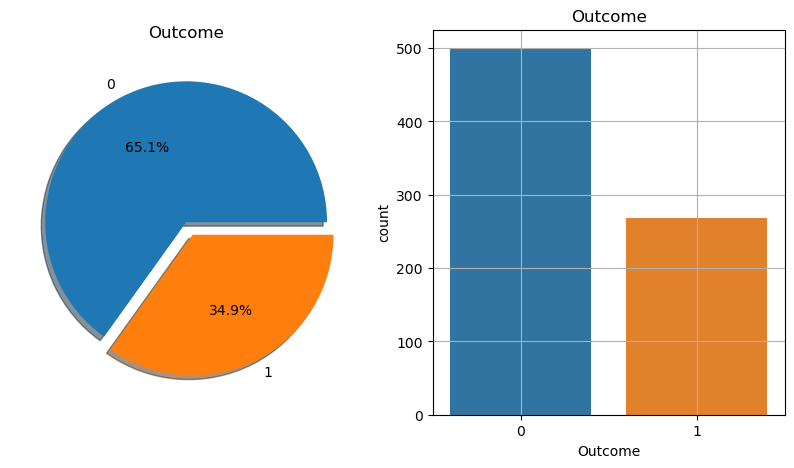

In [17]:
#Looking at the number patients who have diabetes and petients who don have diabetes.
#This helps see if the data is balanced or not, not that it needs to be balanced.
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
negative, postive = df['Outcome'].value_counts()
#Number 1 represents a postive in diabetes
#Number 0 represents a negative in diabetes
print('Postive for diabetes (1): ', postive)
print('Negative for diabetes (0): ', negative)

plt.grid()
plt.show()

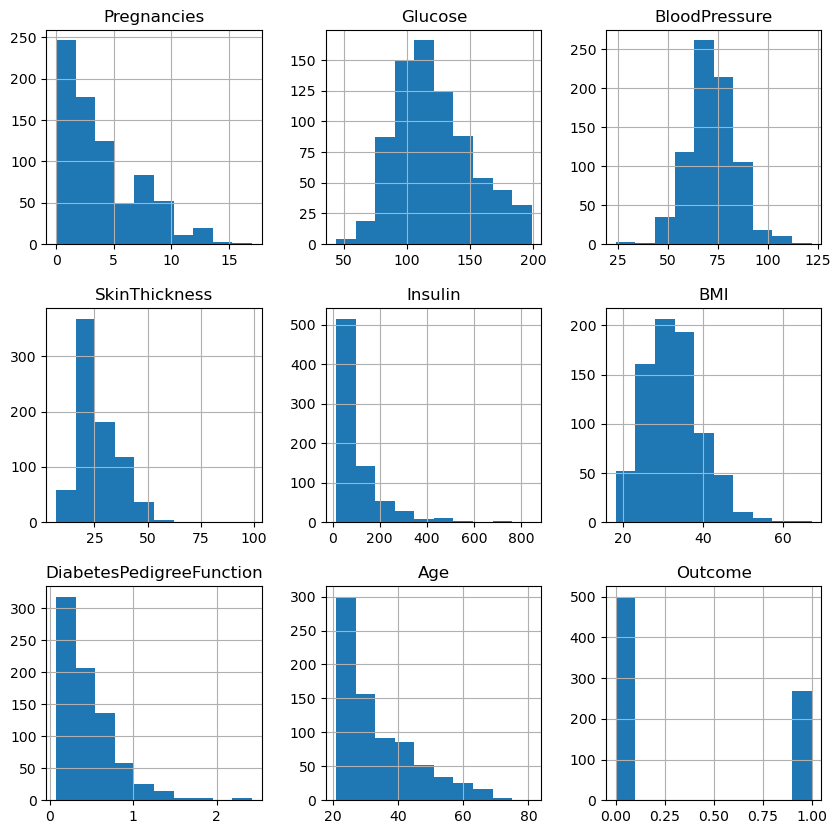

In [18]:
#Histogram visualiazation
df.hist(bins=10, figsize=(10,10))
plt.show()

C:\theAnaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


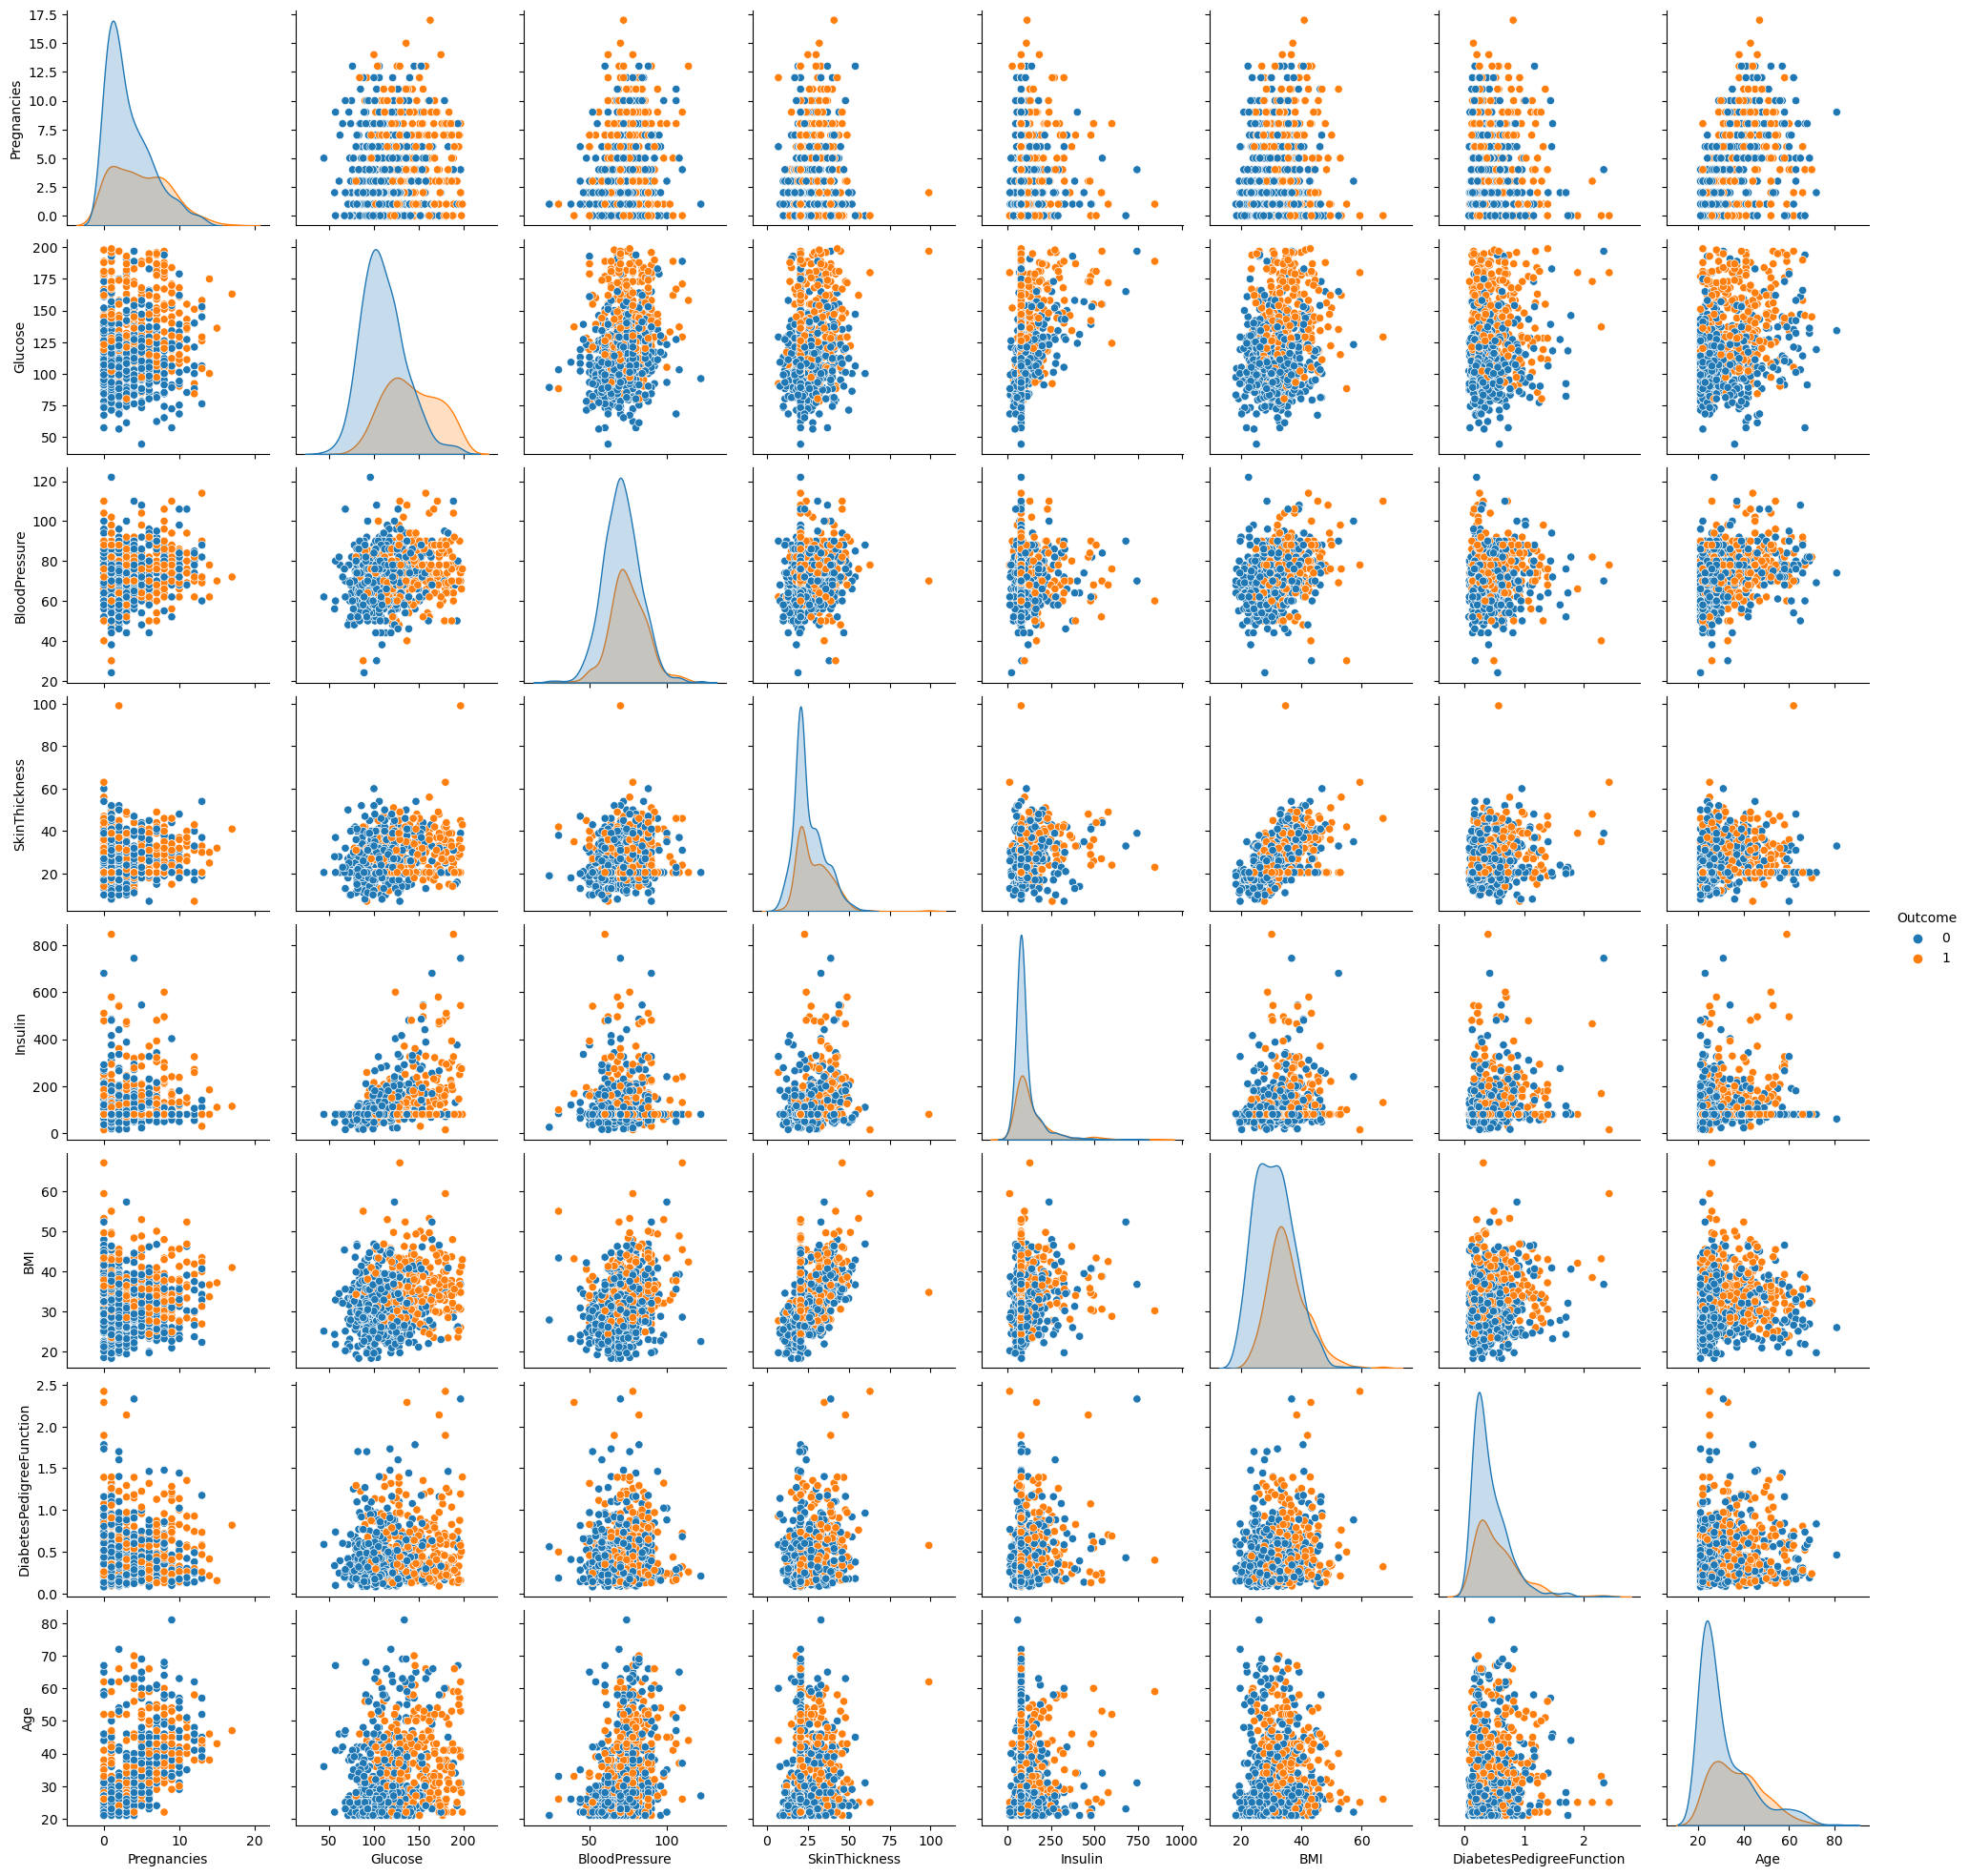

In [19]:
#Creating scatterplots between all the variables
sns.pairplot(data=df, hue='Outcome')
plt.show()

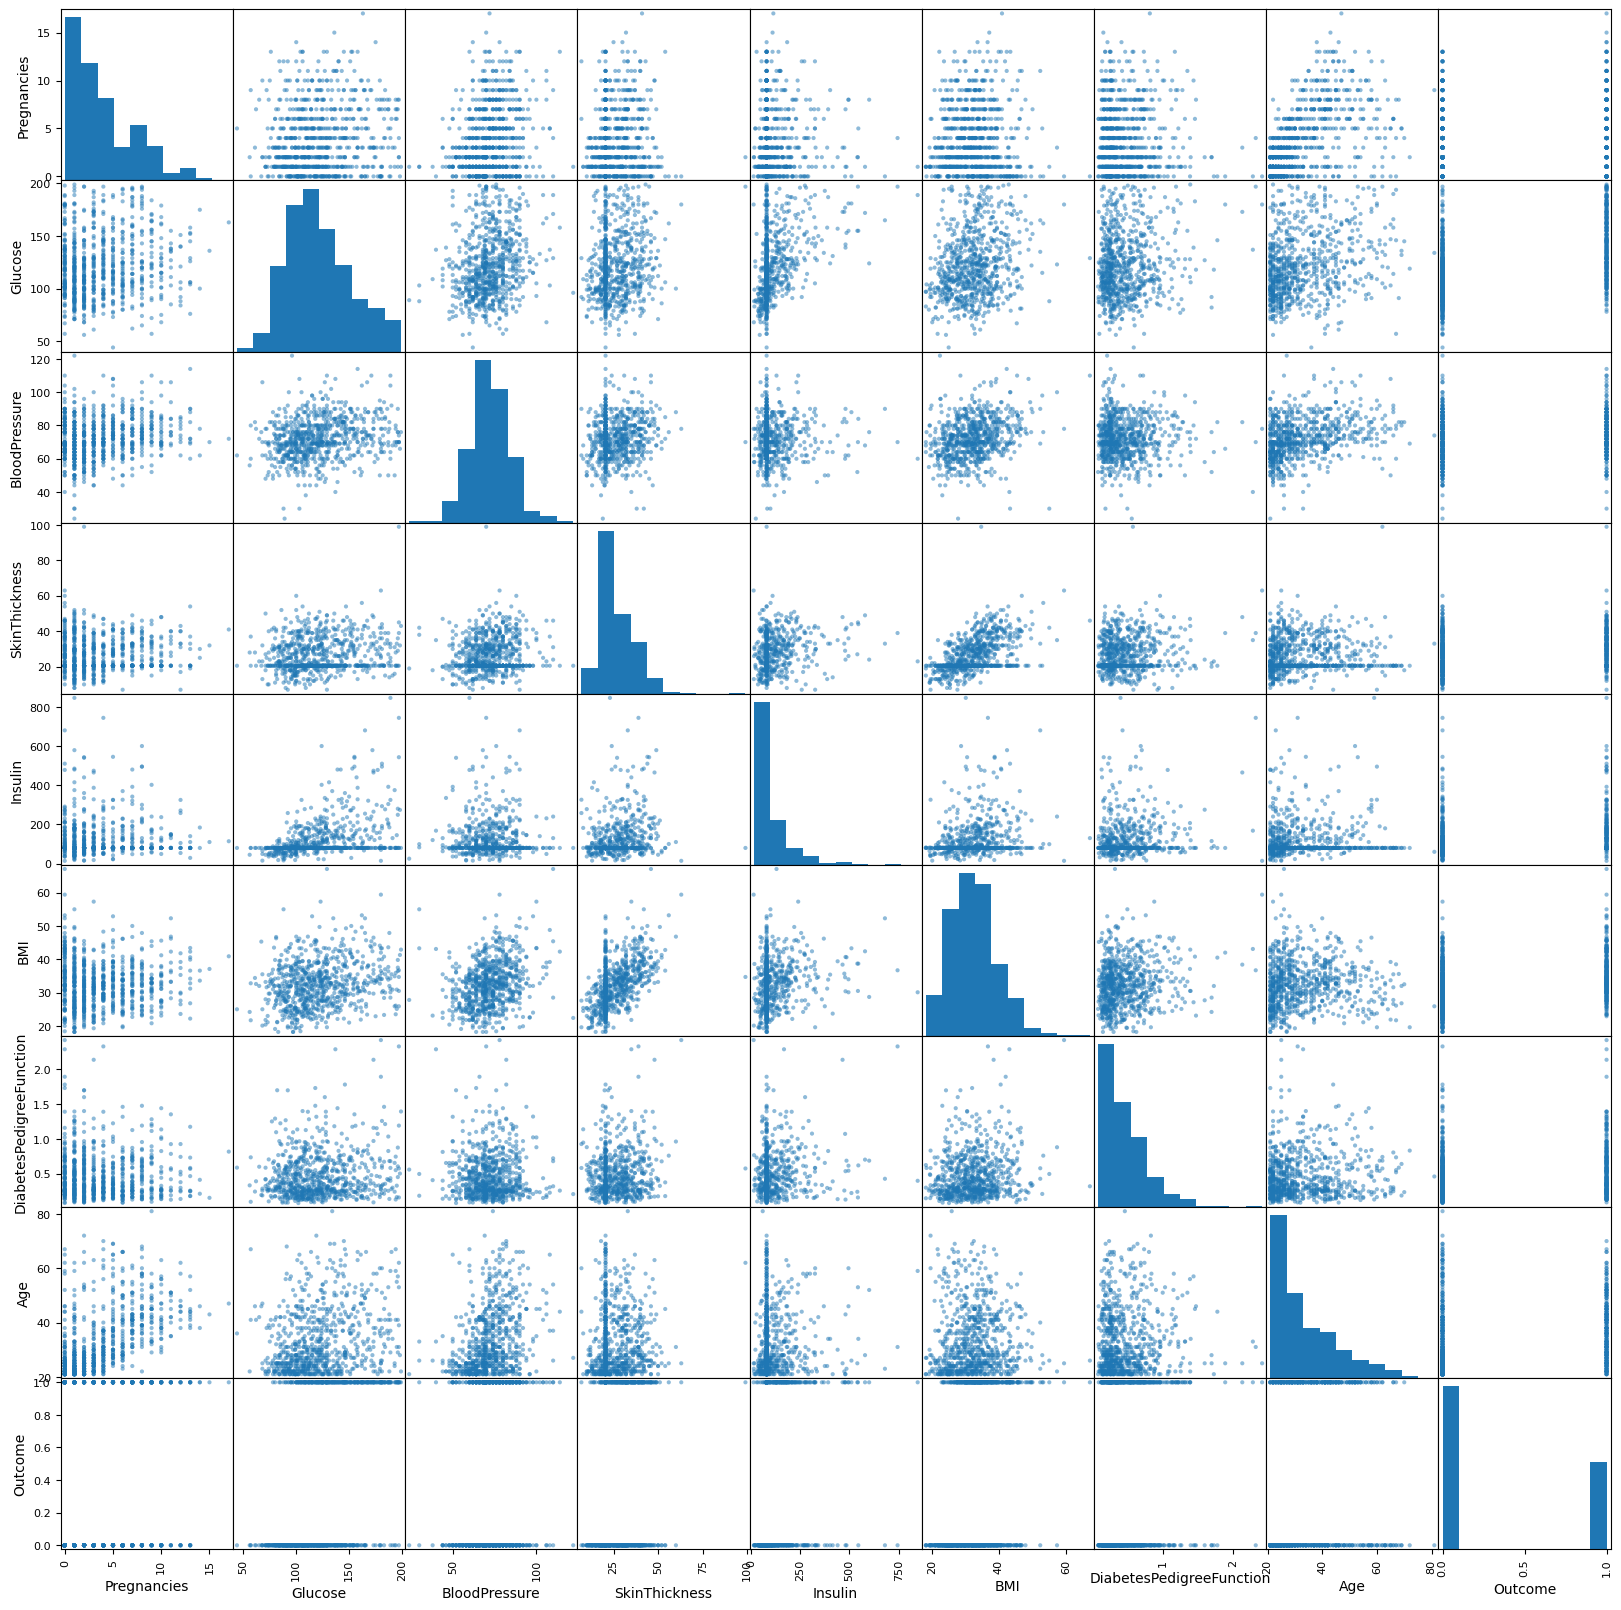

In [20]:
#
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,20));

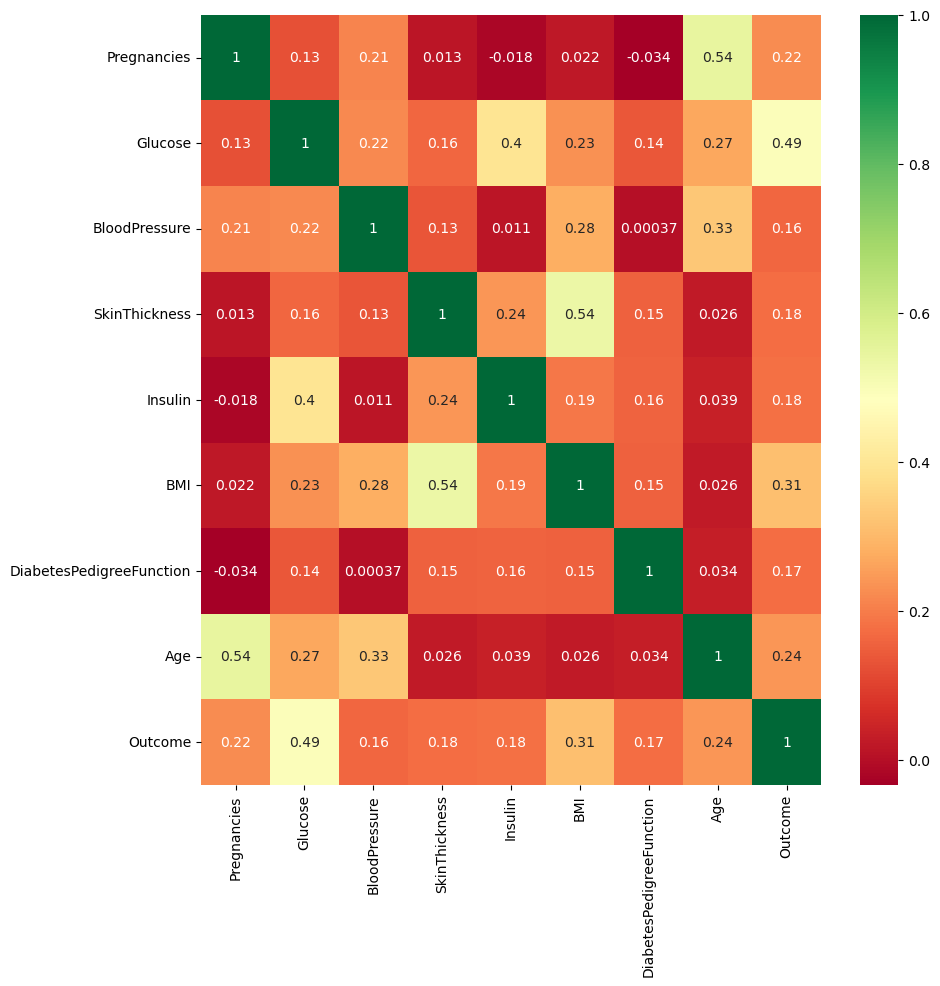

In [21]:
#looking at the correlation of the variables
corrmatrix = df.corr()
top_correlation_features = corrmatrix.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_correlation_features].corr(),annot=True, cmap="RdYlGn")

**When you look at the correlation between Outcome and the features listed below, you can see that there is a high correlation 
Glucose = 0.49
BMI = 0.31
Age = 0.24
Because of the high correlation, these features will be chosen as input variables, thus predeicting the outcome.**

In [22]:
response_variable = 'Outcome'

#here the object is separated, to make it the dependent variable
y = df[response_variable]

#the dependent variable 'Outcome' is separated from the ther features because it it the dependent variable that will be predicted
X = df.drop(response_variable, axis=1)

In [23]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [24]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [25]:
#Applying a scaler, normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScalerX = scaler.transform(X)

# Measuring Success: Training and Testing Data
The label data that has been collected is slpit into two parts:The training set and testing test. The training set is used to build the machine learning model. The testing set is used to evaluate the model, it assess how well the model works.
The 80/20 rule will be used for splitting the data, that is 80% training set and 20% testing set.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(StandardScalerX, y, test_size=0.2, random_state = 7)

In [27]:
# importing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Naive-Bayes Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB

#instantiating the model
naive_bayes = GaussianNB()

#fitting the model
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [29]:
# testing the model
naive_bayes_predict = naive_bayes.predict(X_test)

In [30]:
#looking at the different accuracy scores 
print('Naive Bayes Train Accuracy Score:', naive_bayes.score(X_train, y_train)*100)
print('Naive Bayes Test Accuracy Score:', naive_bayes.score(X_test, y_test)*100)
print('Naive Bayes Accuracy Score:', accuracy_score(y_test, naive_bayes_predict)*100)

Naive Bayes Train Accuracy Score: 74.2671009771987
Naive Bayes Test Accuracy Score: 74.02597402597402
Naive Bayes Accuracy Score: 74.02597402597402


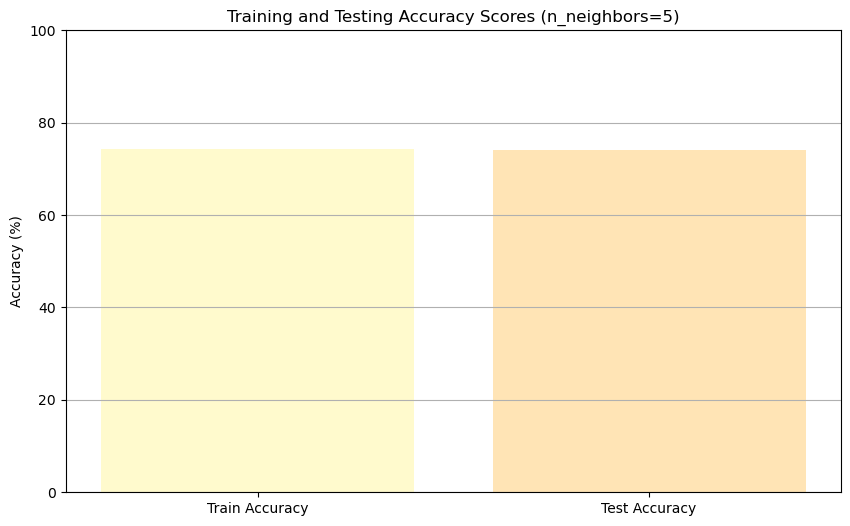

In [31]:
training_accuracy_score = naive_bayes.score(X_train, y_train)*100
testing_accuracy_score = naive_bayes.score(X_test, y_test)*100

# Plot the training and testing scores
plt.figure(figsize=(10, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], color=['lemonchiffon', 'moccasin'])
plt.title(f'Training and Testing Accuracy Scores (n_neighbors={5})')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

In [32]:
conf_matrix_nb = confusion_matrix (y_test, naive_bayes_predict)

print('Confusion Matrix\n\n',conf_matrix_nb)
print('\nTrue Positive = ', conf_matrix_nb[0,0],
     '\nTrue Negative = ', conf_matrix_nb[1,1],
     '\nFalse Positive = ', conf_matrix_nb[0,1],
     '\nFalse Negative = ', conf_matrix_nb[1,0] )

Confusion Matrix

 [[78 19]
 [21 36]]

True Positive =  78 
True Negative =  36 
False Positive =  19 
False Negative =  21


<Axes: >

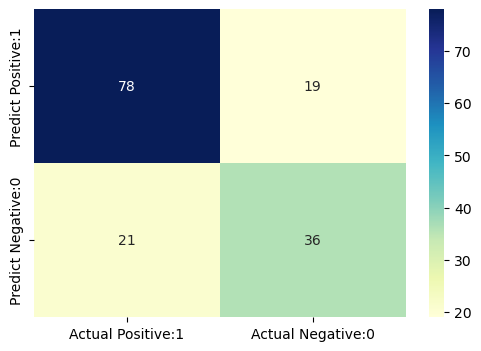

In [33]:
#Visualization of the confusion matrix
plt.figure(figsize=(6,4))

conf_matrix_nb = pd.DataFrame(data=conf_matrix_nb, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='YlGnBu')

**The confusion matrix is revealing that 114 (78 + 36) prediction are correct and 40 (19 + 21) predictions are incorrect.**

In [34]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(StandardScalerX, y, test_size=0.2, random_state = 42)

In [35]:
#instantiating the model
naive_bayes_ = GaussianNB()

#fitting the model
naive_bayes.fit(X_train_nb, y_train_nb)

GaussianNB()

In [36]:
naive_bayes_predict_ = naive_bayes.predict(X_test_nb)

print('Naive Bayes Train Accuracy Score:', naive_bayes.score(X_train_nb, y_train_nb)*100)
print('Naive Bayes Test Accuracy Score:', naive_bayes.score(X_test_nb, y_test)*100)
print('Naive Bayes Accuracy Score:', accuracy_score(y_test_nb, naive_bayes_predict_)*100)

Naive Bayes Train Accuracy Score: 74.1042345276873
Naive Bayes Test Accuracy Score: 58.44155844155844
Naive Bayes Accuracy Score: 75.32467532467533


Attempted to improve the accuracy score by changing the random_state = 42, but this action caused overfitting because even though the train accuracy is high, the test accuracy is very low.
The random_state = 7 remain for the Naive Bayes because the model performs well

# K-Nearest Neighbors Classifier (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
knn_predict = knn.predict(X_test)

knn_predict

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

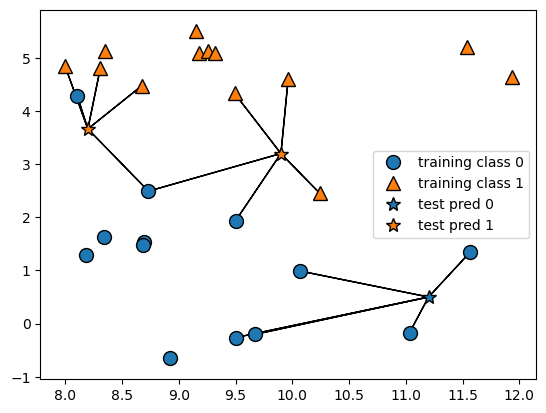

In [39]:
import mglearn

#visual presentation when k = 5
mglearn.plots.plot_knn_classification(n_neighbors=5)

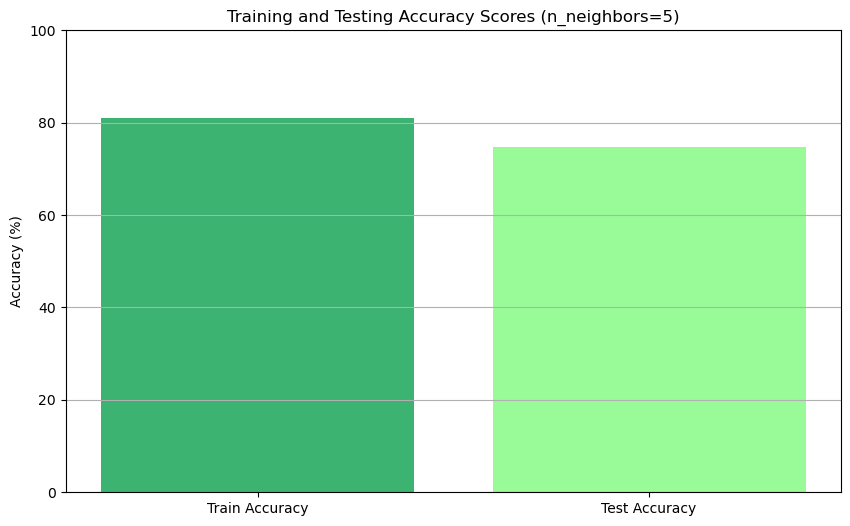

In [40]:
training_accuracy_score = knn.score(X_train, y_train)*100
testing_accuracy_score = knn.score(X_test, y_test)*100

# Plot the training and testing scores
plt.figure(figsize=(10, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], color=['mediumseagreen', 'palegreen'])
plt.title(f'Training and Testing Accuracy Scores (n_neighbors={5})')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

In [41]:
#Viewing the accuracy scores
print('KNN Train Accuracy Score: ', knn.score(X_train, y_train)*100)
print('KNN Test Accuracy Score:', knn.score(X_test, y_test)*100)
print('KNN Accuracy Score:', accuracy_score(y_test, knn_predict)*100)

KNN Train Accuracy Score:  81.10749185667753
KNN Test Accuracy Score: 74.67532467532467
KNN Accuracy Score: 74.67532467532467


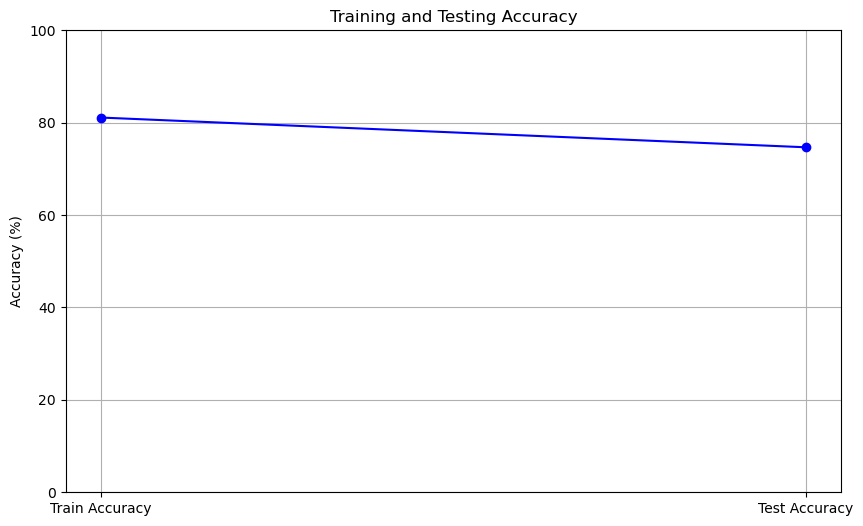

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], marker='o', linestyle='-', color='blue')
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [43]:
conf_matrix_ = confusion_matrix (y_test, knn_predict)

print('Confusion Matrix\n\n',conf_matrix_)
print('\nTrue Positive = ', conf_matrix_[0,0],
     '\nTrue Negative = ', conf_matrix_[1,1],
     '\nFalse Positive = ', conf_matrix_[0,1],
     '\nFalse Negative = ', conf_matrix_[1,0] )

Confusion Matrix

 [[82 15]
 [24 33]]

True Positive =  82 
True Negative =  33 
False Positive =  15 
False Negative =  24


**Observations** 


Initially, the number of k was set to 5, this is the train and test data with a random_state = 7. 
The accuracy of this was:
KNN Train Accuracy Score:  81.10
KNN Test Accuracy Score: 74.67
KNN Accuracy Score: 74.67

This shows that there is no overfitting or underfitting because the train set accuracy score and test set accuracy set are not far apart, further evaluation was conducted using the confusion matrix. This further evaluation encouraged the need to improve the model.


The results of the confusion matrix before the model was improved were:
Confusion Matrix

True Positive = 82 
True Negative = 33 
False Positive = 15 
False Negative = 24

The correct predictions were added up and came to a total of 115 and the incorrect predictions were added together and came to a total of 39. This was okay but not good, the model could be improved just a bit.



In [44]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)

knn3_predict = knn_3.predict(X_test)

print('KNN Train Accuracy Score: ', knn_3.score(X_train, y_train)*100)
print('KNN Test Accuracy Score:', knn_3.score(X_test, y_test)*100)
print('KNN Accuracy Score:', accuracy_score(y_test, knn3_predict)*100)

KNN Train Accuracy Score:  83.71335504885994
KNN Test Accuracy Score: 72.07792207792207
KNN Accuracy Score: 72.07792207792207


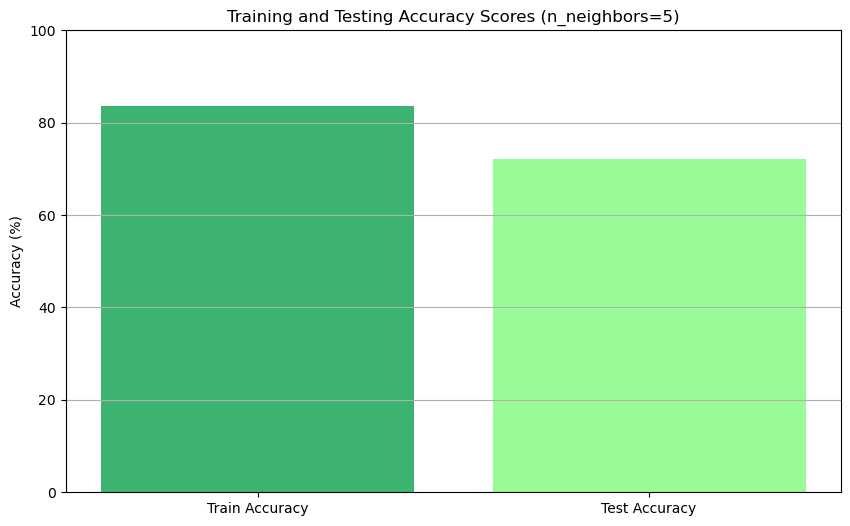

In [45]:
training_accuracy_score = knn_3.score(X_train, y_train)*100
testing_accuracy_score = knn_3.score(X_test, y_test)*100

# Plot the training and testing scores
plt.figure(figsize=(10, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], color=['mediumseagreen', 'palegreen'])
plt.title(f'Training and Testing Accuracy Scores (n_neighbors={5})')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

In [46]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)

knn7_predict = knn.predict(X_test)

print('KNN Train Accuracy Score: ', knn_7.score(X_train, y_train)*100)
print('KNN Test Accuracy Score:', knn_7.score(X_test, y_test)*100)
print('KNN Accuracy Score:', accuracy_score(y_test, knn7_predict)*100)

KNN Train Accuracy Score:  80.45602605863192
KNN Test Accuracy Score: 75.32467532467533
KNN Accuracy Score: 74.67532467532467


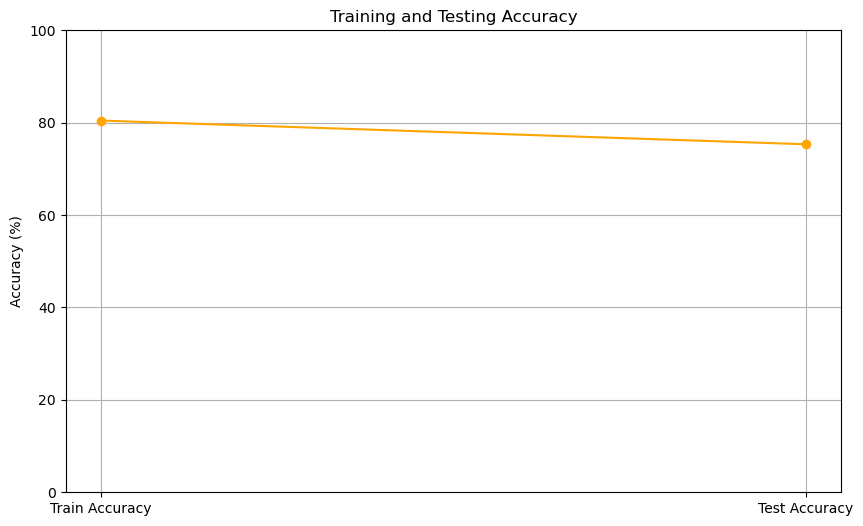

In [47]:
training_accuracy_score = knn_7.score(X_train, y_train)*100
testing_accuracy_score = knn_7.score(X_test, y_test)*100

plt.figure(figsize=(10, 6))
plt.plot(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], marker='o', linestyle='-', color='orange')
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [48]:
knn_9 = KNeighborsClassifier(n_neighbors = 9)
knn_9.fit(X_train, y_train)


knn9_predict = knn_9.predict(X_test)

print('KNN Train Accuracy Score: ', knn_9.score(X_train, y_train)*100)
print('KNN Test Accuracy Score:', knn_9.score(X_test, y_test)*100)
print('KNN Accuracy Score:', accuracy_score(y_test, knn9_predict)*100)

KNN Train Accuracy Score:  78.50162866449512
KNN Test Accuracy Score: 76.62337662337663
KNN Accuracy Score: 76.62337662337663


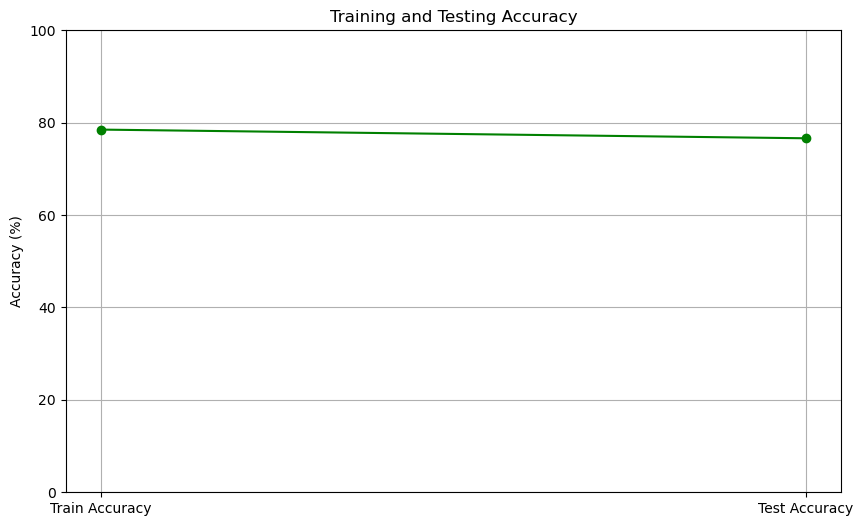

In [49]:
training_accuracy_score = knn_9.score(X_train, y_train)*100
testing_accuracy_score = knn_9.score(X_test, y_test)*100

plt.figure(figsize=(10, 6))
plt.plot(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], marker='o', linestyle='-', color='green')
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [50]:
knn_11 = KNeighborsClassifier(n_neighbors = 11)
knn_11.fit(X_train, y_train)

knn11_predict = knn_11.predict(X_test)

print('KNN Train Accuracy Score: ', knn_11.score(X_train, y_train)*100)
print('KNN Test Accuracy Score:', knn_11.score(X_test, y_test)*100)
print('KNN Accuracy Score:', accuracy_score(y_test, knn11_predict)*100)

KNN Train Accuracy Score:  78.82736156351791
KNN Test Accuracy Score: 77.92207792207793
KNN Accuracy Score: 77.92207792207793


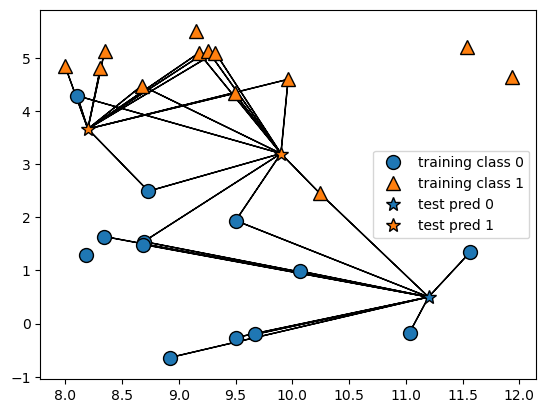

In [51]:

#visual presentation when k = 5
mglearn.plots.plot_knn_classification(n_neighbors=11)

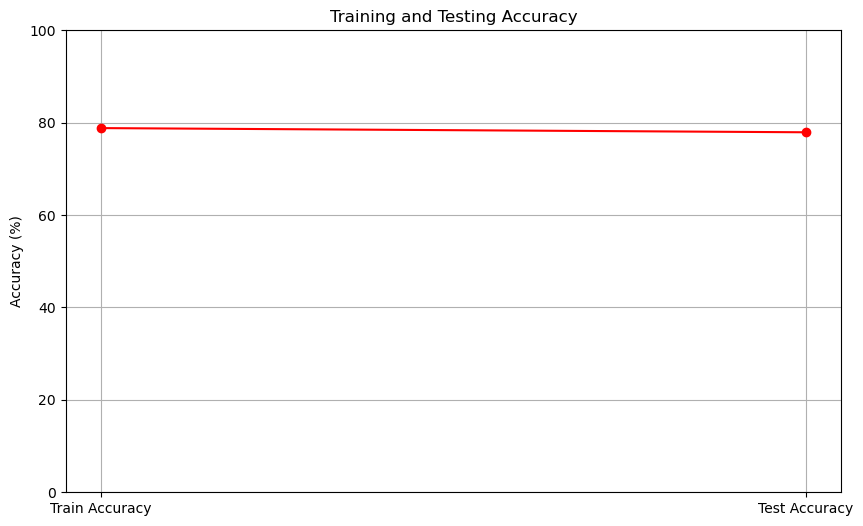

In [52]:
training_accuracy_score = knn_11.score(X_train, y_train)*100
testing_accuracy_score = knn_11.score(X_test, y_test)*100

plt.figure(figsize=(10, 6))
plt.plot(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], marker='o', linestyle='-', color='red')
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [53]:
knn_17 = KNeighborsClassifier(n_neighbors = 17)
knn_17.fit(X_train, y_train)

knn17_predict = knn_17.predict(X_test)

print('KNN Train Accuracy Score: ', knn_17.score(X_train, y_train)*100)
print('KNN Test Accuracy Score:', knn_17.score(X_test, y_test)*100)
print('KNN Accuracy Score:', accuracy_score(y_test, knn17_predict)*100)

KNN Train Accuracy Score:  79.15309446254072
KNN Test Accuracy Score: 80.51948051948052
KNN Accuracy Score: 80.51948051948052


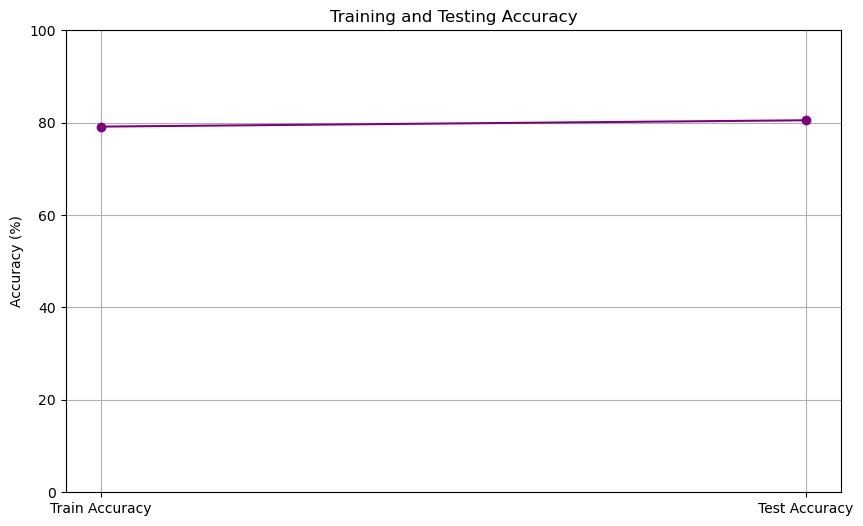

In [54]:
training_accuracy_score = knn_17.score(X_train, y_train)*100
testing_accuracy_score = knn_17.score(X_test, y_test)*100

plt.figure(figsize=(10, 6))
plt.plot(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], marker='o', linestyle='-', color='purple')
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [55]:
knn_6 = KNeighborsClassifier(n_neighbors = 6)
knn_6.fit(X_train, y_train)

knn6_predict = knn.predict(X_test)

print('KNN Train Accuracy Score: ', knn_6.score(X_train, y_train)*100)
print('KNN Test Accuracy Score:', knn_6.score(X_test, y_test)*100)
print('KNN Accuracy Score:', accuracy_score(y_test, knn6_predict)*100)

KNN Train Accuracy Score:  79.80456026058633
KNN Test Accuracy Score: 74.67532467532467
KNN Accuracy Score: 74.67532467532467


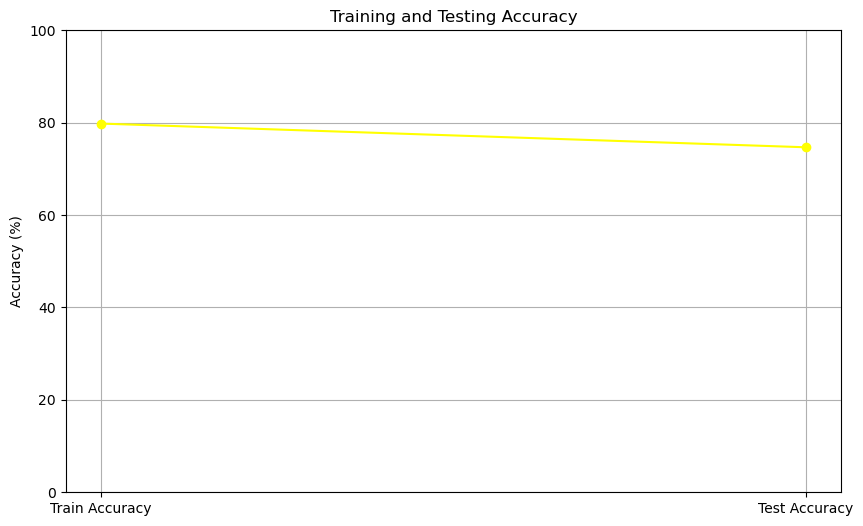

In [56]:
training_accuracy_score = knn_6.score(X_train, y_train)*100
testing_accuracy_score = knn_6.score(X_test, y_test)*100

plt.figure(figsize=(10, 6))
plt.plot(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], marker='o', linestyle='-', color='yellow')
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

**Observation**

Different numbers of k were set to see if the model would be improved or not. K was 3, 7, 9 and so on, this revealed that the accuracy scores were going down, these were observed through bar graphs and line charts. Due to scores decreasing, 5 was the number of k that was used to get a good number of correct predictions. Some of the assinged k numbers do increase the training accuracy set slightly but decreases the other accuarcy scores, the aim for every accuarcy score ti increase, even slightly.

In [57]:
#Changing the random_state = 42

In [58]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(StandardScalerX, y, test_size=0.2, random_state =42)

**------**



The next action that was taken to attempt to improve the model was changing the random_state, it was changed from 7 to 42, and this was applied to the KNN only. 

In [59]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train2, y_train2)

knn5_predict = knn.predict(X_test2)

print('KNN Train Accuracy Score: ', knn_5.score(X_train2, y_train2)*100)
print('KNN Test Accuracy Score:', knn_5.score(X_test2, y_test2)*100)
print('KNN Accuracy Score:', accuracy_score(y_test2, knn5_predict)*100)

KNN Train Accuracy Score:  83.22475570032573
KNN Test Accuracy Score: 76.62337662337663
KNN Accuracy Score: 81.16883116883116


**Observations**



This change showed a slight improvement, 

From:
    
KNN Train Accuracy Score:  81.10
    
KNN Test Accuracy Score: 74.67
    
KNN Accuracy Score: 74.67

To:

KNN Train Accuracy Score:  83.22
    
KNN Test Accuracy Score: 76.62
    
KNN Accuracy Score: 81.16

No overfitting or underfitting was detected based on the train accuracy score and test accuracy score.


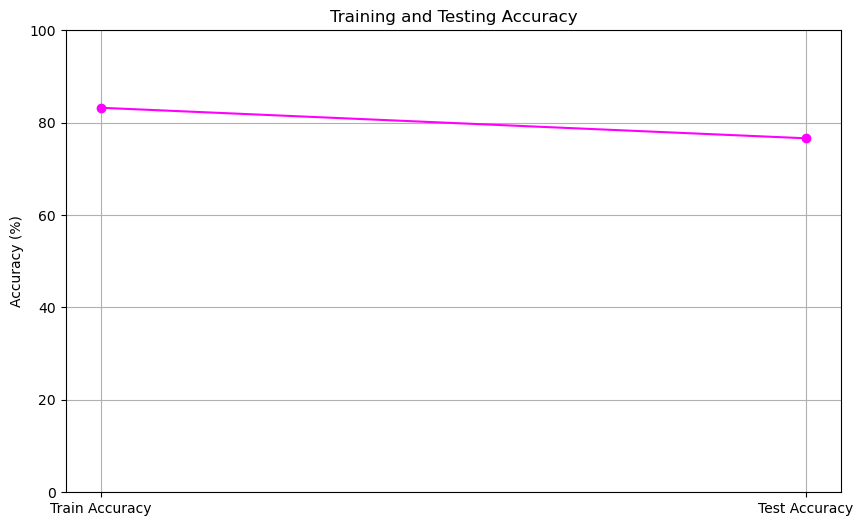

In [60]:
training_accuracy_score = knn_5.score(X_train2, y_train2)*100
testing_accuracy_score = knn_5.score(X_test2, y_test2)*100

plt.figure(figsize=(10, 6))
plt.plot(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], marker='o', linestyle='-', color='magenta')
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [61]:
#Importing the Confusion Matrix
#A confusion matrix provides a summary of a classification model. 
#This tool provides a clear vision of the model performance and the kind of errors that occured.
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix (y_test2, knn5_predict)

print('Confusion Matrix\n\n',conf_matrix)
print('\nTrue Positive = ', conf_matrix[0,0],
     '\nTrue Negative = ', conf_matrix[1,1],
     '\nFalse Positive = ', conf_matrix[0,1],
     '\nFalse Negative = ', conf_matrix[1,0] )

Confusion Matrix

 [[83 16]
 [13 42]]

True Positive =  83 
True Negative =  42 
False Positive =  16 
False Negative =  13


<Axes: >

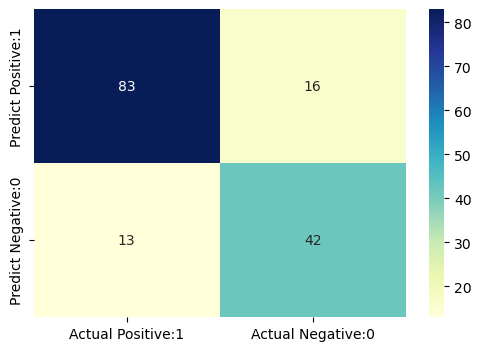

In [62]:
plt.figure(figsize=(6,4))

conf_matrix_ = pd.DataFrame(data=conf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(conf_matrix_, annot=True, fmt='d', cmap='YlGnBu')

**Further evaluation took place using the confusion matrix, the following:**
    
Confusion Matrix

 
True Positive = 83 

True Negative = 42 

False Positive = 16 

False Negative = 13

The confusion matrix reveals that 128 (84 + 44) predictions are correct, and 26 (11 + 15) predictions are incorrect. 

This indicated that the model was indeed improved. The number of correct predictions increased from 115 to 128, and the number of incorrect predictions decreased from 39 to 26.


**The confusion matrix is revealing that 128 (84 + 44) prediction are correct and 26 (11 + 15) predictions are incorrect.
Try to decrease the incorrect number**

In [63]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train2, y_train2)

knn7_predict = knn_7.predict(X_test2)

print('KNN Train Accuracy Score: ', knn_7.score(X_train2, y_train2)*100)
print('KNN Test Accuracy Score:', knn_7.score(X_test2, y_test2)*100)
print('KNN Accuracy Score:', accuracy_score(y_test2, knn7_predict)*100)

KNN Train Accuracy Score:  80.61889250814332
KNN Test Accuracy Score: 75.97402597402598
KNN Accuracy Score: 75.97402597402598


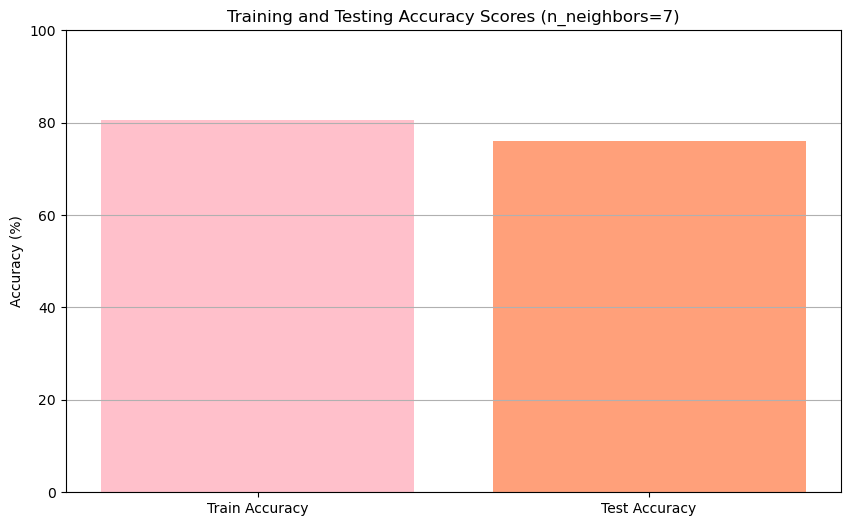

In [64]:
training_accuracy_score = knn_7.score(X_train2, y_train2)*100
testing_accuracy_score = knn_7.score(X_test2, y_test2)*100

# Plot the training and testing scores
plt.figure(figsize=(10, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], color=['pink', 'lightsalmon'])
plt.title(f'Training and Testing Accuracy Scores (n_neighbors={7})')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

In [65]:
conf_matrix_7 = confusion_matrix (y_test2, knn7_predict)

print('Confusion Matrix\n\n',conf_matrix_7)
print('\nTrue Positive = ', conf_matrix_7[0,0],
     '\nTrue Negative = ', conf_matrix_7[1,1],
     '\nFalse Positive = ', conf_matrix_7[0,1],
     '\nFalse Negative = ', conf_matrix_7[1,0] )

Confusion Matrix

 [[84 15]
 [22 33]]

True Positive =  84 
True Negative =  33 
False Positive =  15 
False Negative =  22


**#####**


This improvement was good, but it was as far as it got with improvement. An attempt to change the k value was made but that decreased the accuracy score and did not improve the confusion matrix.

KNN accuracy for random_state = 7 : 74.67532467532467
KNN accuracy for random_state = 42 : 81.16883116883116


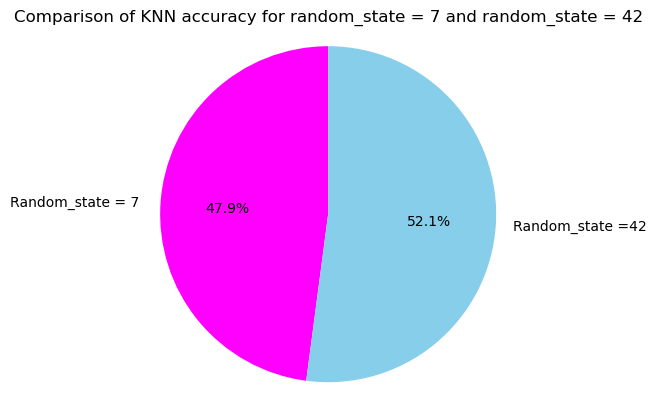

In [66]:
knn_accuracy_score_7 = accuracy_score(y_test, knn_predict)*100
knn_accuracy_score_42 = accuracy_score(y_test2, knn5_predict)*100

print('KNN accuracy for random_state = 7 :',knn_accuracy_score_7 )
print('KNN accuracy for random_state = 42 :', knn_accuracy_score_42)

labels = ['Random_state = 7 ', 'Random_state =42']
sizes = [knn_accuracy_score_7, knn_accuracy_score_42]
colors =['magenta', 'skyblue']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Comparison of KNN accuracy for random_state = 7 and random_state = 42')

plt.show()

# Comparing the accuracy of the K-NN algorithm to the Naïve Bayes Classifier. 

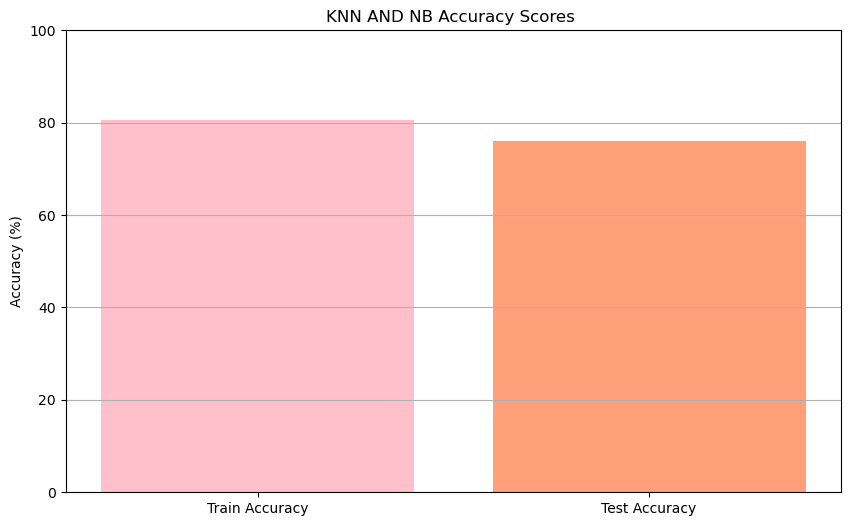

In [67]:
nb_accuracy_score = accuracy_score(y_test, naive_bayes_predict)*100
knn_accuracy_score = accuracy_score(y_test2, knn5_predict)*100

# Plot the training and testing scores
plt.figure(figsize=(10, 6))
plt.bar(['Train Accuracy', 'Test Accuracy'], [training_accuracy_score, testing_accuracy_score], color=['pink', 'lightsalmon'])
plt.title(f'KNN AND NB Accuracy Scores ')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

NB Accuracy Score: 74.02597402597402
KNN Accuracy Score : 81.16883116883116


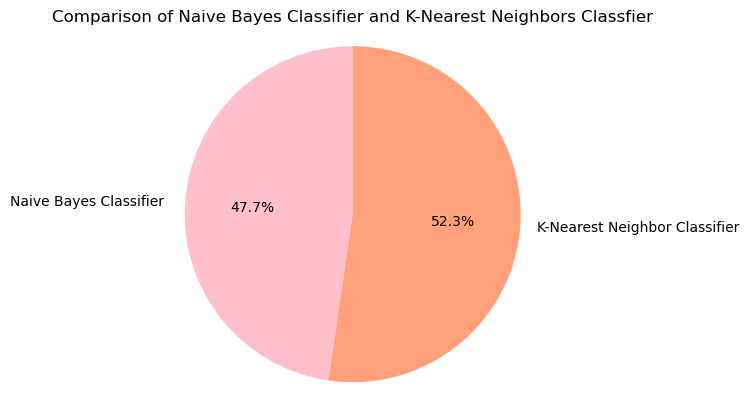

In [68]:
nb_accuracy_score =accuracy_score(y_test, naive_bayes_predict)*100
knn_accuracy_score = accuracy_score(y_test2, knn5_predict)*100

print('NB Accuracy Score:',nb_accuracy_score )
print('KNN Accuracy Score :', knn_accuracy_score)

labels = ['Naive Bayes Classifier ', 'K-Nearest Neighbor Classifier']
sizes = [nb_accuracy_score, knn_accuracy_score]
colors =['pink', 'lightsalmon']


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Comparison of Naive Bayes Classifier and K-Nearest Neighbors Classfier')

plt.show()

# Conclusion
Both models perform relatively well but in this, the KNN classier handles the data well compared to the Naïve Bayes, this can also be because there was a challenge in improving the Naive Bayes model.